### Load the dataset

In [3]:
from datasets import load_dataset
import grapheme
from collections import Counter
import matplotlib.pyplot as plt


sin_ds = load_dataset("openlanguagedata/flores_plus", "sin_Sinh")
train_texts_si = [item['text'] for item in sin_ds['dev']]


g:\4th year\1st sem\Research Project\experiments\gpe-reproduce\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\thamara.DESKTOP-EKMI9CT\.cache\huggingface\hub\datasets--openlanguagedata--flores_plus. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating devtest split: 100%|██████████| 1012/101

### 1. Unique Unicode characters

In [4]:
char_counter = Counter()
for sentence in train_texts_si:
    char_counter.update(sentence)

unique_chars = set(char_counter.keys())
print(f"Number of unique Unicode characters: {len(unique_chars)}")

# Show most frequent characters
print("\n\n\nMost common Unicode characters:")
for char, count in char_counter.most_common(10):
    print(f"'{char}' (U+{ord(char):04X}) → {count}")


Number of unique Unicode characters: 155



Most common Unicode characters:
' ' (U+0020) → 19285
'්' (U+0DCA) → 9435
'ි' (U+0DD2) → 7310
'න' (U+0DB1) → 6868
'ව' (U+0DC0) → 6268
'ය' (U+0DBA) → 5470
'ක' (U+0D9A) → 5198
'ර' (U+0DBB) → 5027
'ා' (U+0DCF) → 4691
'ත' (U+0DAD) → 4515


### 2. Unique graphemes (user-perceived characters)

In [5]:
grapheme_counter = Counter()
for sentence in train_texts_si:
    graphemes = list(grapheme.graphemes(sentence))
    grapheme_counter.update(graphemes)

unique_graphemes = set(grapheme_counter.keys())
print(f"\nNumber of unique graphemes: {len(unique_graphemes)}")

# Show most frequent graphemes
print("\nMost common graphemes:")
for g, count in grapheme_counter.most_common(10):
    print(f"'{g}' → {count}")




Number of unique graphemes: 542

Most common graphemes:
' ' → 19282
'ය' → 3461
'ව' → 3059
'න්' → 2653
'ර' → 2499
'න' → 2240
'ම' → 2204
'ක' → 1962
'ට' → 1706
'ස' → 1602


### 3. Number of sentences

In [6]:

num_sentences = len(train_texts_si)
print(f"\nNumber of sentences in 'dev' split: {num_sentences}")


Number of sentences in 'dev' split: 997


### 4. Word length distribution

In [7]:
# Extract all words from sentences
all_words = []
for sentence in train_texts_si:
    words = sentence.strip().split()
    all_words.extend(words)

# Get lengths
char_lengths = [len(word) for word in all_words]
grapheme_lengths = [len(list(grapheme.graphemes(word))) for word in all_words]

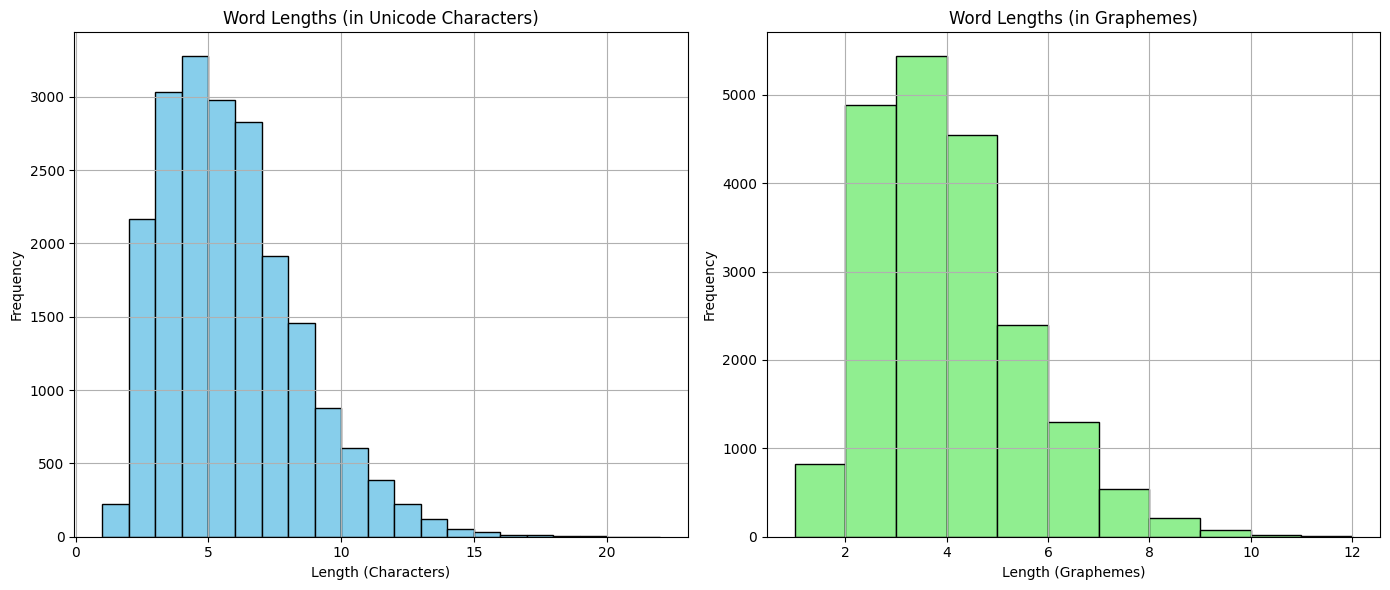

In [8]:
# Plotting
plt.figure(figsize=(14, 6))

# Plot 1: Character Lengths
plt.subplot(1, 2, 1)
plt.hist(char_lengths, bins=range(1, max(char_lengths)+1), color='skyblue', edgecolor='black')
plt.title("Word Lengths (in Unicode Characters)")
plt.xlabel("Length (Characters)")
plt.ylabel("Frequency")
plt.grid(True)

# Plot 2: Grapheme Lengths
plt.subplot(1, 2, 2)
plt.hist(grapheme_lengths, bins=range(1, max(grapheme_lengths)+1), color='lightgreen', edgecolor='black')
plt.title("Word Lengths (in Graphemes)")
plt.xlabel("Length (Graphemes)")
plt.ylabel("Frequency")
plt.grid(True)

plt.tight_layout()
plt.show()

### Word Length Summary

In [14]:
import pandas as pd
import numpy as np

# Convert to numpy arrays
char_lengths_np = np.array(char_lengths)
grapheme_lengths_np = np.array(grapheme_lengths)

summary_df = pd.DataFrame({
    "Statistic": ["Min", "Max", "Mean", "Median", "Q1 (25%)", "Q3 (75%)", "Std Dev"],
    "Char Length": [
        np.min(char_lengths_np),
        np.max(char_lengths_np),
        np.mean(char_lengths_np),
        np.median(char_lengths_np),
        np.percentile(char_lengths_np, 25),
        np.percentile(char_lengths_np, 75),
        np.std(char_lengths_np)
    ],
    "Grapheme Length": [
        np.min(grapheme_lengths_np),
        np.max(grapheme_lengths_np),
        np.mean(grapheme_lengths_np),
        np.median(grapheme_lengths_np),
        np.percentile(grapheme_lengths_np, 25),
        np.percentile(grapheme_lengths_np, 75),
        np.std(grapheme_lengths_np)
    ]
})

print("\nWord Length Summary Table:")
display(summary_df.round(2))



Word Length Summary Table:


,Statistic,Char Length,Grapheme Length
0,Min,1.00,1.00
1,Max,22.00,12.00
2,Mean,5.34,3.52
3,Median,5.00,3.00
4,Q1 (25%),3.00,2.00
5,Q3 (75%),7.00,4.00
6,Std Dev,2.58,1.51
